# Building an Image Classifier

First let's install and importe TensorFlow and Keras

> conda install tensorflow

> pip install --upgrade tensorflow==2.0.0-rc1

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [6]:
keras.__version__

'2.7.0'

In [7]:
tf.__version__

'2.7.0'

___________________________

Dataset of 60,000 29x29 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are 10. From T-shirt/top,Trouser, Pullover to Ankle boot.

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

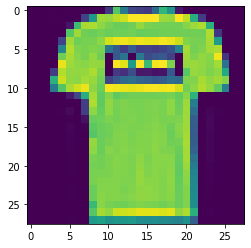

In [10]:
plt.imshow(X_train_full[1])

In [11]:
y_train_full[1]

0

In [15]:
class_names = ["T-shirt/top","Trourser","Pullover","Dress","Coat","Sandal","Shirt",
              "Sneaker","Bag","Ankle boot"]

In [16]:
class_names[y_train_full[1]]

'T-shirt/top'

In [17]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

# Data normalization

We then normalize the data dimensions so that they are of approximately the same scale.

(Have to restrict the pixel intensities between 0 and 1)

In [18]:
X_train_n = X_train_full/255.

In [19]:
X_test_n = X_test/255.

 # Split the data into train/validation/test datasets
 
 In the earlier step of importing the data, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation: Here is how each type of datasets is used in deep learning.
 
 * Training data -- used for training the model
 * Validation data -- used for tunning the hyperparameters and evaluate the models
 * Test data -- used to test the model after the model has gone through initial vetting by the validation set

In [20]:
X_train_n

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [21]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [22]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Create the model architecture
There are two API'S for defining a model in Keras
* Sequential model API
* Functional API

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

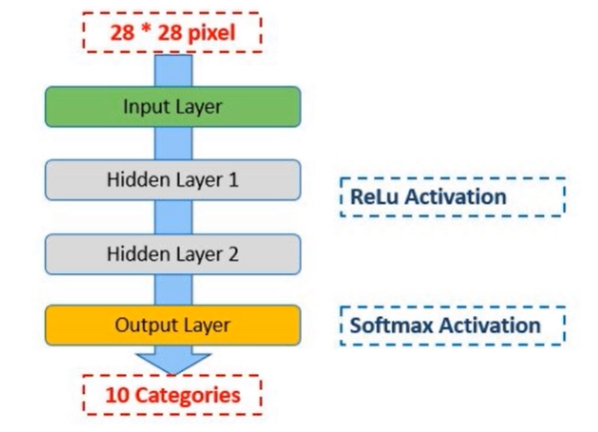

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
import pydot

In [27]:
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [30]:
weights, biases = model.layers[1].get_weights()

In [31]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
biases.shape

(300,)

# Compiling and training our model

Documentation: https://keras.io/models/sequential/

In [42]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"]) 
#sgd-> stocastic gradiant design-> perform backpropagation algorithm

In [45]:
model_history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.8907 - val_loss: 0.3242 - val_accuracy: 0.8812
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2975 - accuracy: 0.8923 - val_loss: 0.3182 - val_accuracy: 0.8870
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2912 - accuracy: 0.8949 - val_loss: 0.3867 - val_accuracy: 0.8578
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2855 - accuracy: 0.8981 - val_loss: 0.3134 - val_accuracy: 0.8888
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2814 - accuracy: 0.8986 - val_loss: 0.3074 - val_accuracy: 0.8896
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9020 - val_loss: 0.3130 - val_accuracy: 0.8882
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2691 - accuracy: 0.9040 - val_loss: 0.3081 - val_accuracy:

In [46]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [47]:
model_history.history

{'loss': [0.30372050404548645,
  0.29754531383514404,
  0.2912066876888275,
  0.285496324300766,
  0.2814478278160095,
  0.27318692207336426,
  0.26913270354270935,
  0.2642546594142914,
  0.2596437633037567,
  0.2550085186958313],
 'accuracy': [0.8907272815704346,
  0.8922908902168274,
  0.8949272632598877,
  0.8980727195739746,
  0.8985999822616577,
  0.9020000100135803,
  0.9039818048477173,
  0.9051454663276672,
  0.9068363904953003,
  0.9086727499961853],
 'val_loss': [0.3241620659828186,
  0.31819960474967957,
  0.38667452335357666,
  0.31343477964401245,
  0.30742108821868896,
  0.31304070353507996,
  0.3081190288066864,
  0.32281816005706787,
  0.3157195448875427,
  0.2981896996498108],
 'val_accuracy': [0.8812000155448914,
  0.8870000243186951,
  0.8578000068664551,
  0.8888000249862671,
  0.8895999789237976,
  0.8881999850273132,
  0.890999972820282,
  0.883400022983551,
  0.8844000101089478,
  0.8921999931335449]}

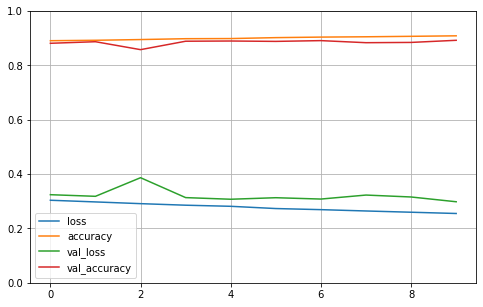

In [53]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Evaluate performance and Predicting

In [54]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8766


[0.33483031392097473, 0.8766000270843506]

In [55]:
X_new = X_test[:3]

In [56]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [62]:
#y_pred = model.predict_classes(X_new)
#y_pred
predict_y = model.predict(X_new) 
classes_y = np.argmax(predict_y ,axis=1)
classes_y

array([9, 2, 1], dtype=int64)

In [64]:
np.array(class_names)[classes_y]

array(['Ankle boot', 'Pullover', 'Trourser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


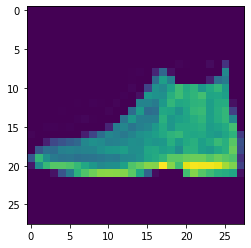

In [65]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


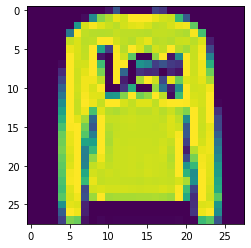

In [66]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


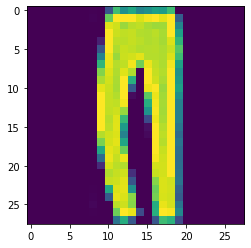

In [67]:
print(plt.imshow(X_test[2]))